In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
import joblib as joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')


In [183]:
df=pd.read_csv('Avacado_Dataset.csv')
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [184]:
df.shape

(1517, 14)

In [185]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [186]:
#removing column unnamed:0 .It is just an index
df=df.drop('Unnamed: 0',axis=1)
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [187]:
#few outliers are present in Total_Volume,4046,4225,Total_Bags,Small_Bags,XLarge_Bags(huge diff in 75% and max) .
#some skewed(left/right) data present in dataset(total_volume,4225,Total Bags ) as thr is a huge diff in mean and 50% .

In [188]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [189]:
df_region_wise_volume=df.groupby(['region']).sum()['Total Volume']

In [190]:
df_region_wise_volume

region
Albany                 5.111443e+06
Atlanta                2.525241e+07
BaltimoreWashington    5.249687e+07
Boise                  5.268001e+06
Boston                 3.431443e+07
BuffaloRochester       6.741403e+06
California             4.586810e+08
Charlotte              5.464623e+06
Chicago                1.867329e+07
Columbus               6.850740e+06
DallasFtWorth          2.032117e+07
Denver                 1.722244e+07
Detroit                1.356261e+07
GrandRapids            4.390393e+06
GreatLakes             5.897445e+07
HarrisburgScranton     4.148077e+06
HartfordSpringfield    3.491504e+06
Houston                3.235137e+07
Indianapolis           2.520069e+06
Jacksonville           5.658909e+06
LasVegas               2.790102e+06
LosAngeles             8.196539e+06
Louisville             2.639857e+06
MiamiFtLauderdale      8.012470e+06
Midsouth               4.239178e+07
Nashville              4.186786e+06
NewYork                5.997083e+07
Northeast            

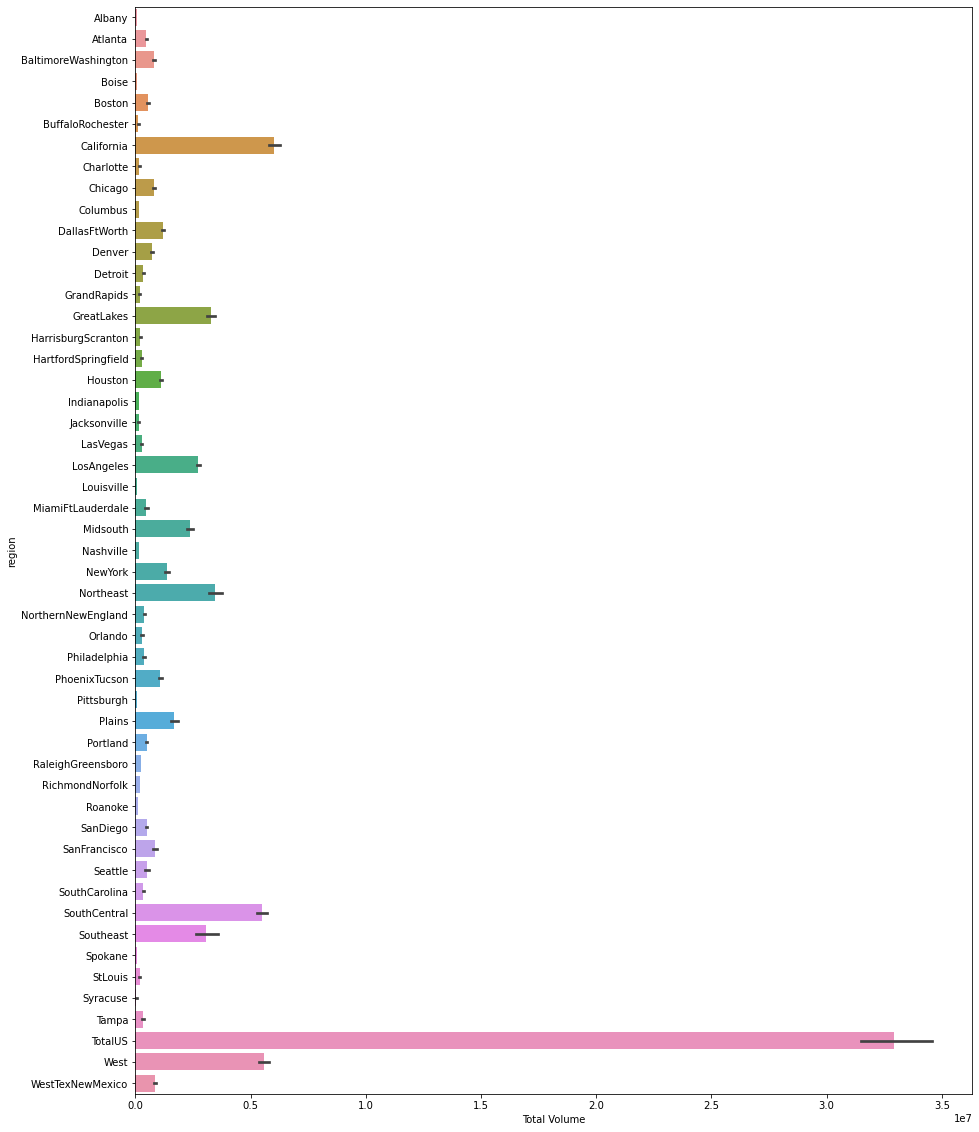

In [191]:
#df_region_wise_volume.plot(kind='bar',figsize=(20,8))
plt.figure(figsize=(15,20))
sns.barplot(data=df,x='Total Volume',y='region')
#from below graph we notice that US people like avacado more than other people 

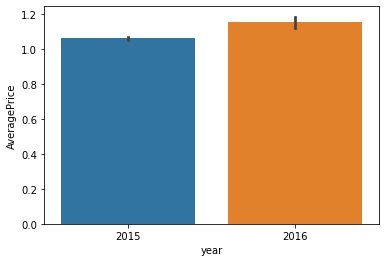

In [192]:
sns.barplot(data=df,x='year',y='AveragePrice')

In [193]:
#2016 year has max avg price comapre to 2015

In [194]:
df.isin(['?']).sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [195]:
df.isin(['-']).sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [196]:
df.isin(['-1']).sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [197]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257856303D0>,
      dtype=object)

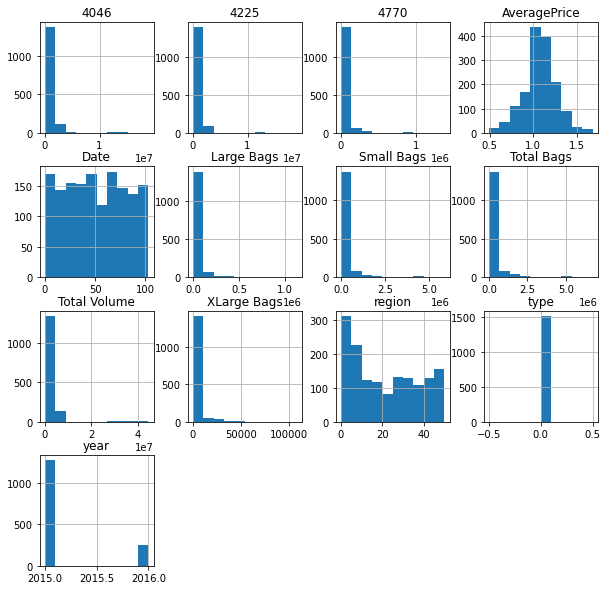

In [198]:
df.hist(figsize=(10,10))

In [199]:
#few skewed data present in Xlarge bag,total volume,xlarge bag etc
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

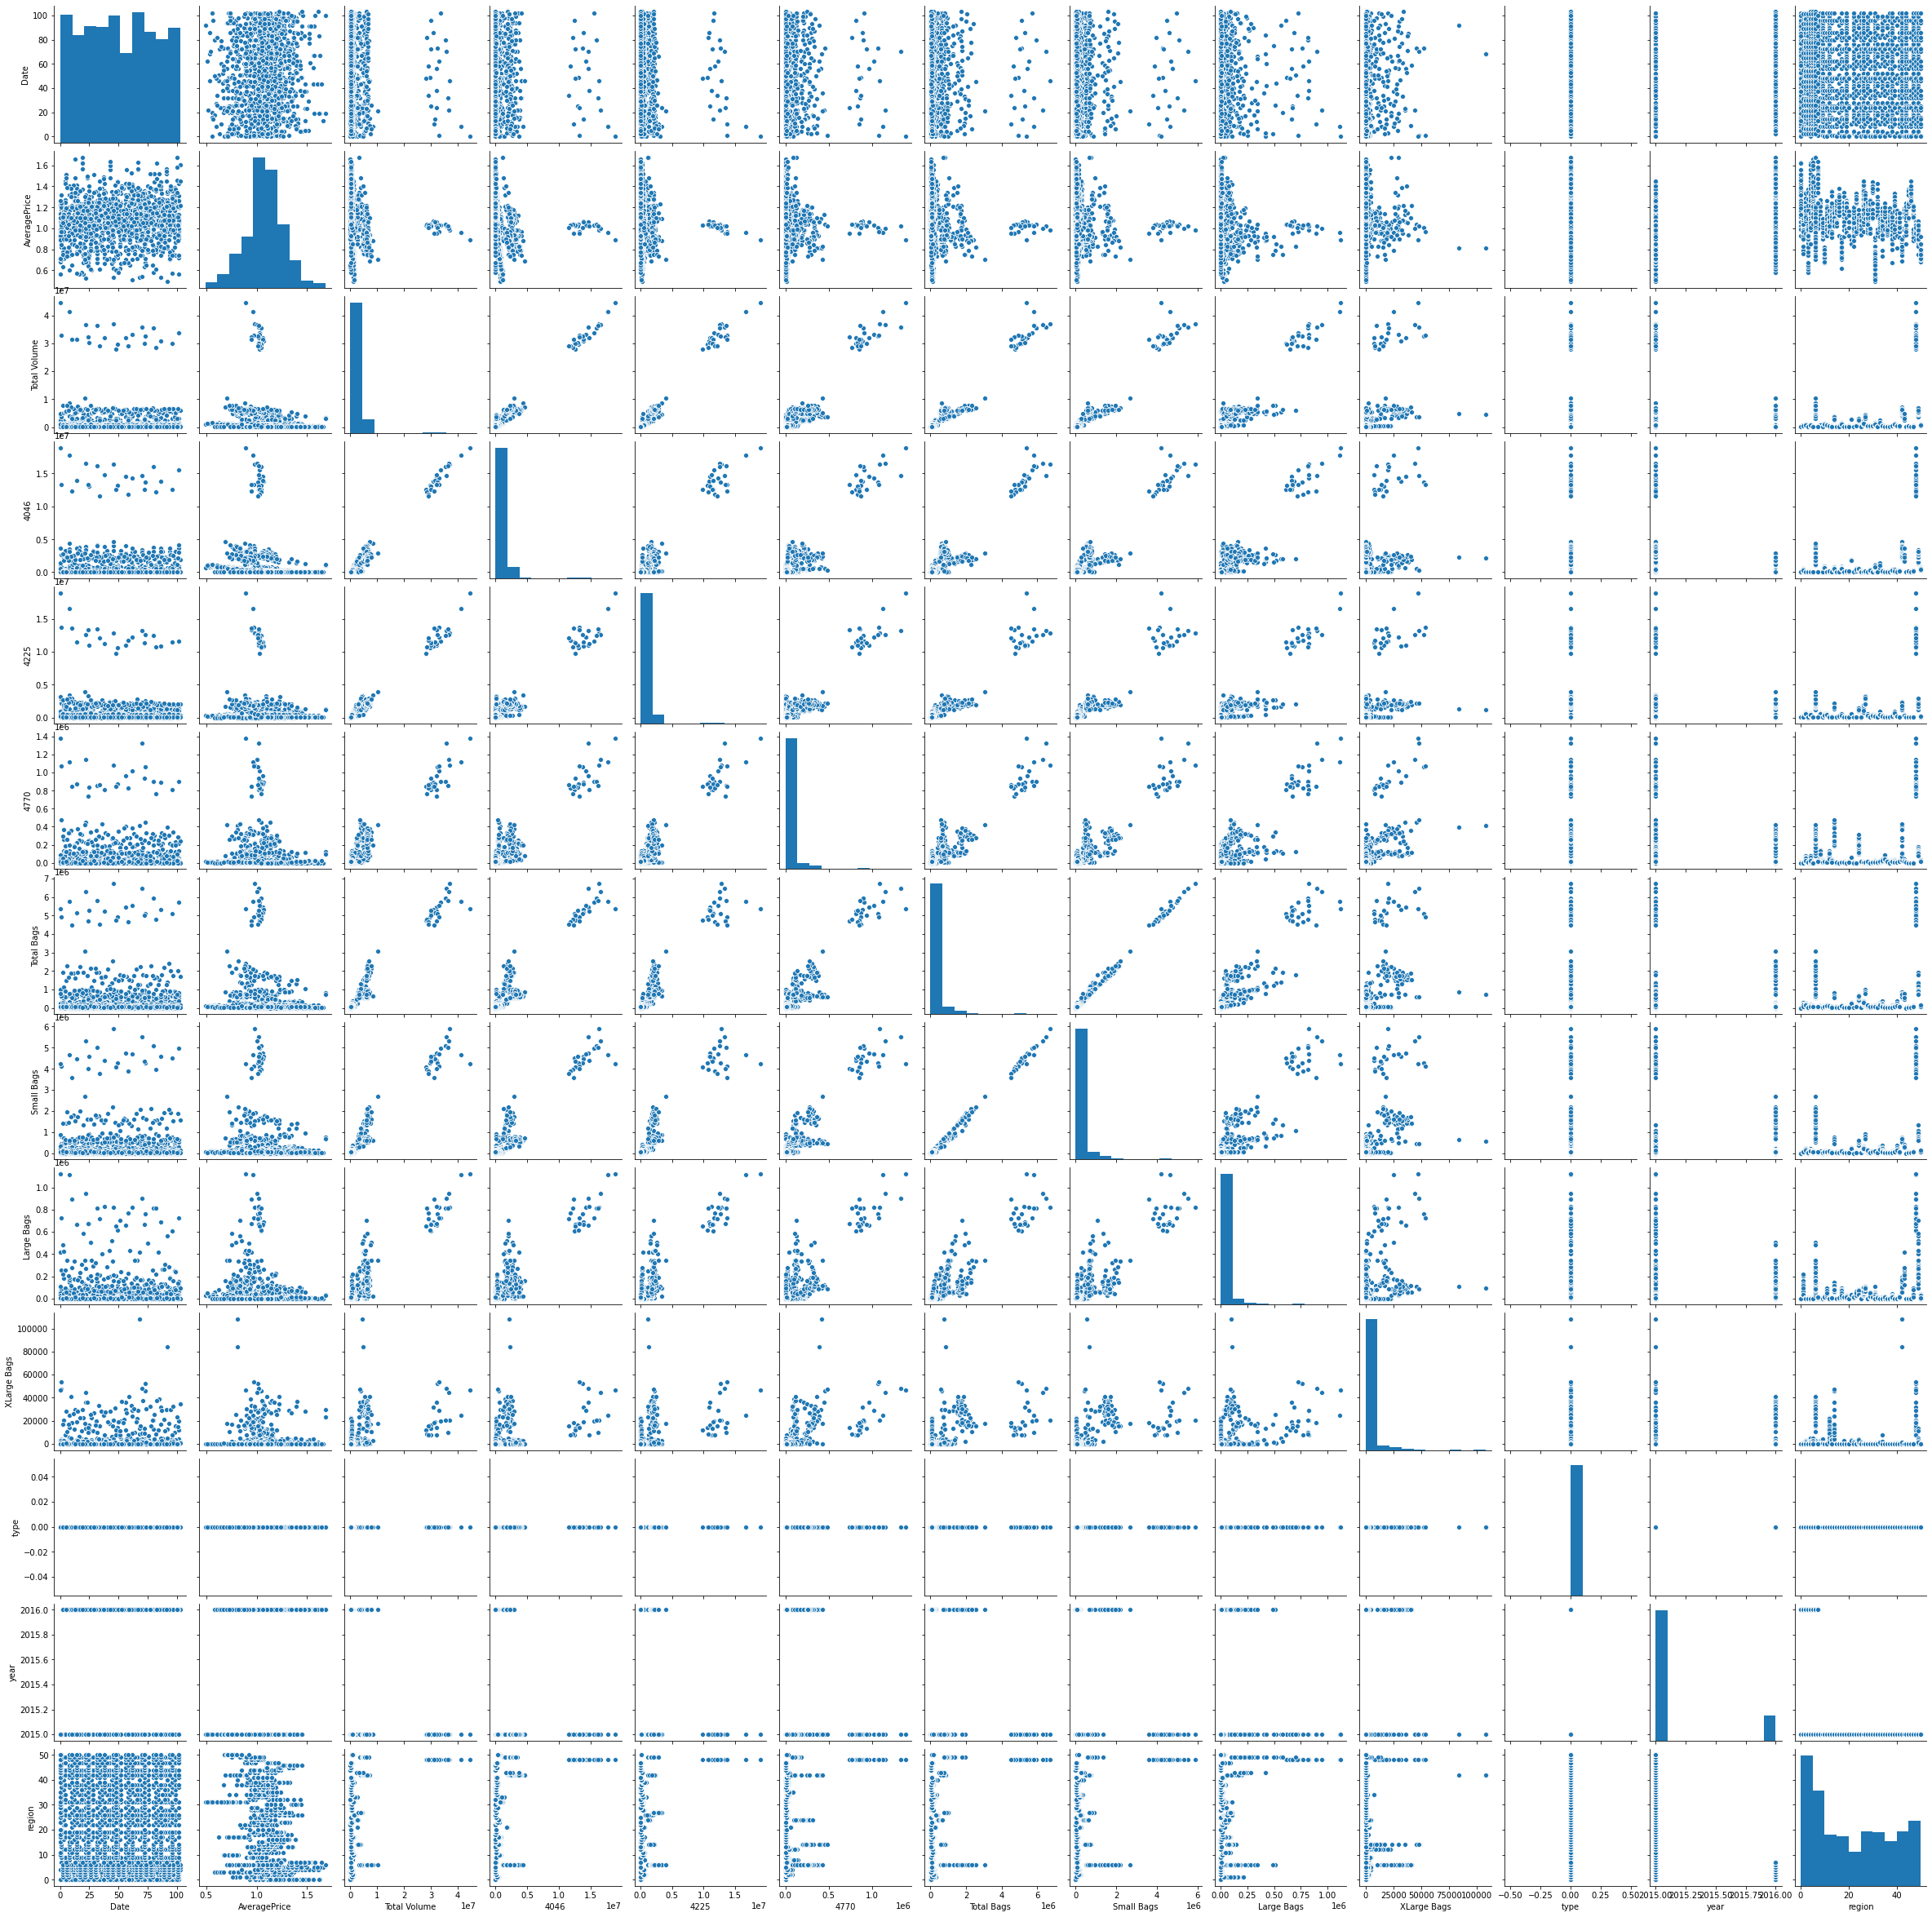

In [200]:
sns.pairplot(data=df)

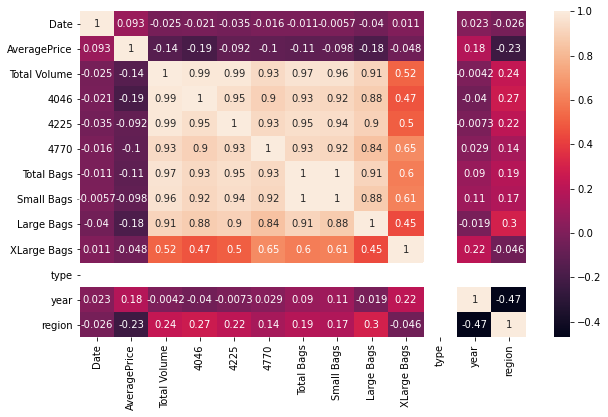

In [201]:
corr_=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_,annot=True)

In [202]:
#removing type,region bcz type does not any relation with any column and thr is a -ve corelation between avg price and region
df=df.drop(['type','region'],axis=1)
df.shape

(1517, 11)

In [203]:
df.skew()

Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [204]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])
       


In [205]:
df.shape

(1517, 11)

Date               AxesSubplot(0.125,0.536818;0.110714x0.343182)
AveragePrice    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Small Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.390714,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

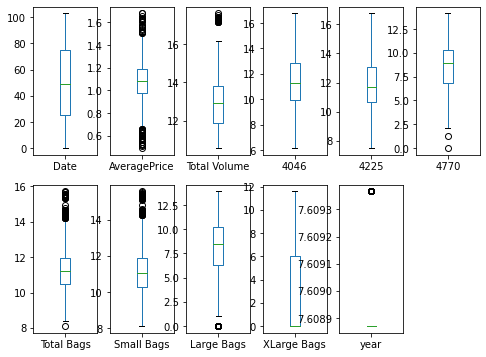

In [206]:
df.plot.box(layout=(2,6),subplots=True,figsize=(8,6))

In [207]:
#few outliers present in data shown in boxplot .remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(1502, 11)

In [208]:
#making feature and target separate
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
print(x.shape,y.shape)

(1502, 10) (1502,)


In [209]:
#scaling x data
sd=StandardScaler();
x=sd.fit_transform(x)
x

array([[ 1.37908964, -1.37593566, -1.84025019, ..., -0.95997905,
        -0.80493206, -0.4393294 ],
       [ 0.57842249, -1.48885662, -2.02701202, ..., -0.94702521,
        -0.80493206, -0.4393294 ],
       [-0.22224466, -0.93854922, -1.95568653, ..., -0.93060451,
        -0.80493206, -0.4393294 ],
       ...,
       [-1.52332878, -0.64345101, -0.18875167, ...,  0.35680809,
         1.13517373,  2.27619638],
       [ 1.07883946, -0.60160785, -0.12160054, ...,  0.35752363,
        -0.80493206,  2.27619638],
       [ 0.27817231, -0.62532467, -0.22032286, ...,  0.45805253,
        -0.80493206,  2.27619638]])

In [210]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [212]:
lr=LinearRegression()

params_={'kernel':['rbf','linear','poly']}
svr=SVR()
print("svr best param :",findBestParam(svr,params_))
svr=SVR(kernel='linear')

svr best param : {'kernel': 'linear'}


In [215]:
params_={'criterion':['mse','friedman_mse','mae'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeRegressor()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))
dtree_reg=DecisionTreeRegressor(criterion='friedman_mse',max_depth=2)

dtree_reg best param : {'criterion': 'friedman_mse', 'max_depth': 2}


In [217]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsRegressor()
print("kn_reg best param :",findBestParam(kn_reg,params_))
kn_reg=KNeighborsRegressor(n_neighbors=20)

kn_reg best param : {'n_neighbors': 20}


In [219]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
lasso_reg=Lasso()
print("lasso_reg best param :",findBestParam(lasso_reg,params_))
lasso_reg=Lasso(alpha=0.01)

lasso_reg best param : {'alpha': 0.01}


In [221]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
ridge_reg=Ridge()
print("ridge_reg best param :",findBestParam(ridge_reg,params_))
ridge_reg=Ridge(alpha=1)

ridge_reg best param : {'alpha': 1.0}


In [223]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDRegressor()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))
sgd_reg=SGDRegressor(alpha=0.01,penalty='l1')

sgd_reg best param : {'alpha': 0.01, 'penalty': 'l1'}


In [225]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
elas_reg=ElasticNet()
print("elasticnet_reg best param :",findBestParam(elas_reg,params_))
elas_reg=ElasticNet(alpha=0.01)

elasticnet_reg best param : {'alpha': 0.01}


In [227]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingRegressor()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))
gradient_reg=GradientBoostingRegressor(learning_rate=0.01)

gradient_reg best param : {'learning_rate': 0.01}


In [230]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,lasso_reg,ridge_reg,sgd_reg,elas_reg]}
ada_reg=AdaBoostRegressor()
print("ada_reg best param :",findBestParam(ada_reg,params_))
ada_reg=AdaBoostRegressor(base_estimator=elas_reg,learning_rate=0.001)

ada_reg best param : {'base_estimator': ElasticNet(alpha=0.01), 'learning_rate': 0.001}


In [231]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['mse','mae']}
rand_reg=RandomForestRegressor()
print("rand_reg best param :",findBestParam(rand_reg,params_))

rand_reg best param : {'criterion': 'mae', 'max_depth': 5, 'n_estimators': 10}


In [232]:
rand_reg=RandomForestRegressor(criterion='mae',max_depth=5,n_estimators=10)

In [233]:
models=[]
models.append(('LinearRegression',lr))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('Lasso',lasso_reg))
models.append(('Ridge',ridge_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('ElasticNet',elas_reg))
models.append(('GradientBoostingRegressor',gradient_reg))
models.append(('AdaBoostRegressor',ada_reg))
models.append(('RandomForestRegressor',rand_reg))

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [239]:
#finding and storing matrix model wise
cross_val_list=[]
r2_list=[]
mse_list=[]
mae_list=[]
rmae_list=[]
model_name_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    rmae_list.append(np.sqrt(mean_absolute_error(y_test,y_pred)))
    model_name_list.append(reg_name)
    

In [241]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_list,'mean_squared_error':mse_list,'mean_absolute_error':mae_list,'root_mean_absolute_error':rmae_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mean_squared_error,mean_absolute_error,root_mean_absolute_error
0,LinearRegression,0.042622,0.436275,0.019014,0.111023,0.333201
1,SVR,0.034822,0.439902,0.018892,0.109447,0.330827
2,DecisionTreeRegressor,0.039290,0.399609,0.020251,0.110223,0.331999
3,KNeighborsRegressor,0.003723,0.585918,0.013967,0.089764,0.299607
4,Lasso,0.106510,0.315943,0.023073,0.118469,0.344193
5,Ridge,0.048990,0.435370,0.019045,0.111004,0.333172
6,SGDRegressor,0.105558,0.311381,0.023227,0.118882,0.344793
7,ElasticNet,0.116795,0.357407,0.021675,0.114962,0.339061
8,GradientBoostingRegressor,0.164612,0.488421,0.017256,0.103276,0.321366
9,AdaBoostRegressor,0.116072,0.364223,0.021445,0.114503,0.338384


In [242]:
#from above matrix Randomforestregressor working better compare to other estimator .


r2_score:  0.6732282352564087 rand state:  66


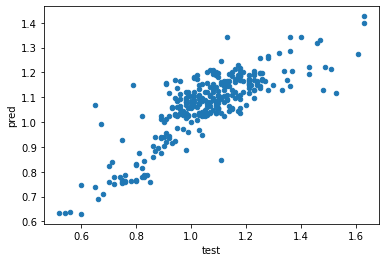

In [245]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rand_reg.fit(x_train,y_train)
y_pred=reg_obj.predict(x_test)
df_op=pd.DataFrame({'test':y_test,'pred':y_pred})
df_op.plot(kind='scatter',x='test',y='pred')

In [246]:
#test data and pred data are likely linear 
#-------------------------------------Lets consider Region as target variable---------------------------------
df=pd.read_csv('Avacado_Dataset.csv')
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [247]:
df.shape

(1517, 14)

In [248]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [249]:
#removing column unnamed:0 .It is just an index
df=df.drop('Unnamed: 0',axis=1)
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [250]:
#few outliers are present in Total_Volume,4046,4225,Total_Bags,Small_Bags,XLarge_Bags(huge diff in 75% and max) .
#some skewed(left/right) data present in dataset(total_volume,4225,Total Bags ) as thr is a huge diff in mean and 50% .

In [251]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

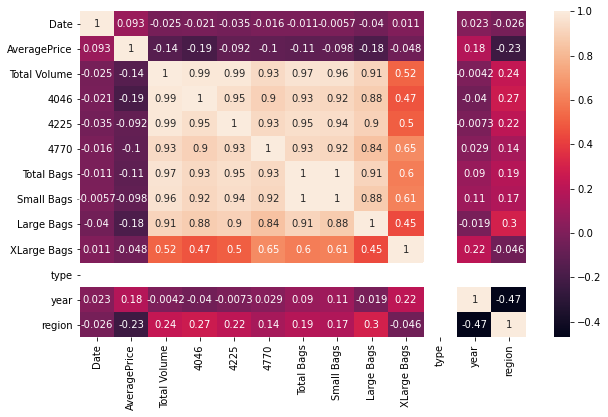

In [252]:
corr_=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_,annot=True)

In [253]:
#drop type ,avg price and year bcz of weak relation with region.
#avg price and year has -ve corelation with target variable region and type has no relation with any of the feature/target variable

df=df.drop(['type','AveragePrice','year'],axis=1)
df.shape

(1517, 10)

Date               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
region             AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

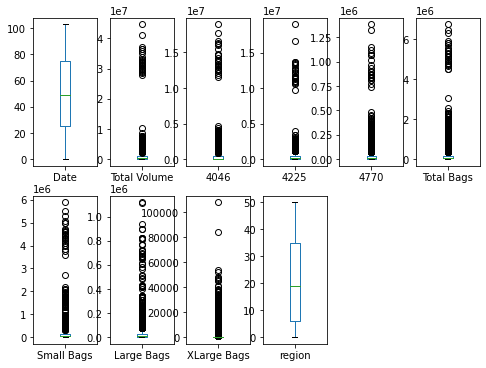

In [254]:
df.plot.box(layout=(2,6),subplots=True,figsize=(8,6))

In [255]:
#few outliers present in data shown in boxplot .remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(1439, 10)

In [256]:
#making feature and target separate
x=df.drop(['region'],axis=1)
y=df['region']
print(x.shape,y.shape)

(1439, 9) (1439,)


In [257]:
#scaling x data
sd=StandardScaler();
x=sd.fit_transform(x)
x

array([[ 1.37397005, -0.56453388, -0.47702473, ..., -0.5236711 ,
        -0.48169066, -0.29905612],
       [ 0.57540675, -0.57078784, -0.47750515, ..., -0.52038908,
        -0.48160491, -0.29905612],
       [-0.22315654, -0.52846287, -0.47734554, ..., -0.52596157,
        -0.48149065, -0.29905612],
       ...,
       [-1.5208219 , -0.48824443, -0.4169448 , ..., -0.34118407,
        -0.3165661 , -0.02110992],
       [ 1.07450881, -0.48108103, -0.40667782, ..., -0.33171533,
        -0.3161596 , -0.29905612],
       [ 0.27594552, -0.48519251, -0.4212503 , ..., -0.32436045,
        -0.24800396, -0.29905612]])

In [258]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [292]:
lr=LogisticRegression()

params_={'kernel':['rbf','linear','poly']}
svr=SVC()
print("svc best param :",findBestParam(svr,params_))
svr=SVC(kernel='linear')

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


svc best param : {'kernel': 'linear'}


In [264]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))
dtree_reg=DecisionTreeClassifier(criterion='entropy',max_depth=10)

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


dtree_reg best param : {'criterion': 'entropy', 'max_depth': 10}


In [266]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))
kn_reg=KNeighborsClassifier(n_neighbors=5)

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


kn_reg best param : {'n_neighbors': 5}


In [268]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))
sgd_reg=SGDClassifier(alpha=0.0001,penalty='l1')

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


sgd_reg best param : {'alpha': 0.0001, 'penalty': 'l1'}


In [293]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))

In [294]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
y_test.unique()
y_train.unique()

array([ 0, 26,  7,  2, 34,  3,  4, 18, 12,  5, 38, 36, 47, 50, 30, 31, 11,
        6, 44, 15, 23,  1, 41, 49, 17, 45, 35, 13, 16, 19,  8, 28, 32, 39,
       25, 10,  9, 42, 24, 29, 33, 22, 40, 20, 14, 43, 21, 37, 27, 46])

In [313]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [304]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score
0,LogisticRegression,0.555220,0.562500
1,SVC,0.644172,0.628472
2,DecisionTreeClassifier,0.862354,0.881944
3,KNeighborsClassifier,0.550374,0.555556
4,SGDClassifier,0.576068,0.631944


In [312]:
#from above matrix decissiontree classifier working better compare to other estimator .
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtree_reg=DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtree_reg.fit(x_train,y_train)
y_pred=dtree_reg.predict(x_test)
print('score',dtree_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))


score 1.0
accuracy_score 0.8854166666666666
confusion_matrix 
 [[10  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  1  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  4]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.79      1.00      0.88        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       1.00      0.88      0.93         8
           5       0.85      1.00      0.92        11
           6       0.91      1.00      0.95        10
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        11
          10       0.67      0.80      0.73         5
          11       1.00      1.00      1.00         2
          12       1.00      0.92      0.96        13
  

In [ ]:
#If we compare both estimator then it is obvious that decisionTree classifier performing better than randomforest regressor .
#score of classifier estimator > score of regressor estimator i.e. 89>67